# load the data and first test the base line 

In [1]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import random
import numpy as np

/home/milad/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
type(iris)

# print the iris data
print(iris.data)


# print the iris data
# print(iris.data)


# print the names of the four features
print(iris.feature_names)


# print integers representing the species of each observation# print 
print(iris.target)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [3]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
# store feature matrix in "X"# store  
X = iris.data

# store response vector in "y"
y = iris.target

In [5]:
x_train_orginal, x_test_orginal, y_train_orginal, y_test_orginal = train_test_split(X, y, test_size=0.2, random_state=4)

In [6]:
mnb = MultinomialNB()
mnb.fit(x_train_orginal,y_train_orginal)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# result of the model  on test data (First step)

In [7]:
#compute the f1 and accuracy

y_pred=mnb.predict(x_test_orginal)

print ("f1 on test data is       {}".format(f1_score(y_test_orginal, y_pred, average='macro')))
print ("Accuracy on test data is {}".format(accuracy_score(y_test_orginal, y_pred)))
confusion_matrix(y_test_orginal, y_pred)

f1 on test data is       0.8095238095238096
Accuracy on test data is 0.8666666666666667


array([[16,  0,  0],
       [ 0,  5,  0],
       [ 0,  4,  5]])

# base line
- change one feature and chek the target (change function)
- change randomly one value and check the target(change random)

# change features one by one 


In [8]:
def change_baseline(x_train,y_train,percetage,mnb,change_plan):
    number_change = int(percetage/100*x_train.shape[0])
    
    x_train_changed = np.copy(x_train)
    row_history=[]
    try_times = 0
    occurred_change=0
    change_done = False
    
        
    for i in range(len(change_plan["number"])):
        for j in range(change_plan["number"][i]):

            change_done = False
            while (change_done == False):

                #find uniqe row & as same as user request 
                row = random.randint(1, x_train.shape[0]-1)
                try_times = 0
                while (mnb.predict([x_train[row]])[0] !=change_plan["key"][i][0] or row in row_history): #row in row_history or

                    row = random.randint(1, x_train.shape[0]-1)
                    if try_times > len(y_train):
                        print("your request is not possiable")
                        break 
                        
                    try_times = try_times + 1
                if try_times > len(y_train):
                    print("part of your request can't run")
                    break
                    
                row_history.append(row)

                for ii in range(x_train.shape[1]): # range(4)
                    x_train_changed[row][ii] = 0

                    if (change_plan["key"][i][1] == mnb.predict([x_train_changed[row]])):
                        print(x_train[row],mnb.predict([x_train[row]])[0])
                        print(x_train_changed[row],mnb.predict([x_train_changed[row]])[0])
                        occurred_change=occurred_change + 1
                        change_done = True
                        print(" \n change number {} \n".format(occurred_change))
                        break
                    else:
#                         print("this change doesnot run")
                        x_train_changed[row]= np.copy(x_train[row])
                


    return np.copy(x_train_changed)
        

In [9]:
change_plan={"key":[[0,1]],"number":[6]}
baseline_out=change_baseline(x_test_orginal,y_test_orginal,20,mnb,change_plan)

[ 5.4  3.4  1.7  0.2] 0
[ 5.4  0.   1.7  0.2] 1
 
 change number 1 

[ 5.8  4.   1.2  0.2] 0
[ 5.8  0.   1.2  0.2] 1
 
 change number 2 

[ 4.9  3.1  1.5  0.1] 0
[ 4.9  0.   1.5  0.1] 1
 
 change number 3 

[ 5.1  3.8  1.5  0.3] 0
[ 5.1  0.   1.5  0.3] 1
 
 change number 4 

[ 4.7  3.2  1.6  0.2] 0
[ 4.7  0.   1.6  0.2] 1
 
 change number 5 

[ 4.8  3.4  1.9  0.2] 0
[ 0.   3.4  1.9  0.2] 1
 
 change number 6 



In [10]:
y_pred_baseline_changed=mnb.predict(baseline_out)


print ("f1 on same train data is       {}".format(f1_score(y_test_orginal, y_pred_baseline_changed, average='macro')))
print ("Accuracy on test data is {}".format(accuracy_score(y_test_orginal, y_pred_baseline_changed)))
confusion_matrix(y_test_orginal,y_pred_baseline_changed)

f1 on same train data is       0.6611721611721612
Accuracy on test data is 0.6666666666666666


array([[10,  6,  0],
       [ 0,  5,  0],
       [ 0,  4,  5]])

   # change random

In [13]:
def change_random(x_train,y_train,percetage,mnb,change_plan):
    number_change_requested = int(percetage/100*x_train.shape[0])
    
    print("{} percentage error is equal to {} change \n".format(percetage,number_change_requested))
    
    success_row=[]
    col_history=[]
    fail_row=[]
    occurred_change=0
    try_times = 1
    x_train_changed = np.copy(x_train)
    
            
    for i in range(len(change_plan["number"])):

        success_row=[]
        fail_row=[]
        
        for j in range(change_plan["number"][i]):

            change_done = False
            while (change_done == False):

                #find uniqe row & as same as user request 
                row = random.randint(0, x_train.shape[0]-1)
                
                while ((mnb.predict([x_train[row]])[0] !=change_plan["key"][i][0]) or (y_train[row]!=change_plan["key"][i][0])):
                    if row not in fail_row:
                        fail_row.append(row)
                    row = random.randint(0, x_train.shape[0]-1)
                    while(row in success_row):
                        row = random.randint(0, x_train.shape[0]-1)
                        if len(fail_row)+len(success_row)==len(y_train):
#                             print("part of your request can't run")
                            break
                    if len(fail_row)+len(success_row)==len(y_train):
#                         print("your request is not possiable")
                        break

                if row in success_row:
                    if len(success_row)+len(fail_row)<len(y_train):
                        while(row in success_row or row in fail_row):
                            row = random.randint(0, x_train.shape[0]-1)
                            print(row)


                    break
   
                while (len(col_history)<=x_train.shape[1]): #range 4
                    col = random.randint(0,x_train.shape[1]-1)
                    while col in col_history:
                        col = random.randint(0,x_train.shape[1]-1)
                        if (len(col_history)==x_train.shape[1]):
                            break
                    col_history.append(col)

                    
                    x_train_changed[row][col] = 0
                    fail_row =set(fail_row)-set(success_row)
                    fail_row=list(fail_row)
                    
                    if (change_plan["key"][i][1] == mnb.predict([x_train_changed[row]])[0]) and (y_train[row]==change_plan["key"][i][0]) and (mnb.predict([x_train_changed[row]])[0]!=mnb.predict([x_train[row]])[0]):

                        print("row is {}".format(row))
                        print(x_train[row],mnb.predict([x_train[row]])[0])
                        print(x_train_changed[row],mnb.predict([x_train_changed[row]])[0])
                        occurred_change=occurred_change + 1
                        success_row.append(row)
                        change_done = True
                        col_history=[]
                        
                        print(" \n change number {} done\n".format(occurred_change))
                        break
                    else:
                        x_train_changed[row]= np.copy(x_train[row])
                
                    if len(fail_row)+len(success_row)==len(y_train):
                        break
                        
                if (occurred_change ==False) and (row not in fail_row):
                    fail_row.append(row)

            if row not in success_row:
                fail_row.append(row)


    if (occurred_change<number_change_requested):
        print("your request doesn't complete! please change your plan")


    return np.copy(x_train_changed)
         



In [14]:
change_plan={"key":[[0,1]],"number":[6]}
new_random = change_random(x_test_orginal,y_test_orginal,20,mnb,change_plan)

20 percentage error is equal to 6 change 

row is 26
[ 4.5  2.3  1.3  0.3] 0
[ 0.   2.3  1.3  0.3] 1
 
 change number 1 done

row is 23
[ 5.   3.4  1.6  0.4] 0
[ 5.   0.   1.6  0.4] 1
 
 change number 2 done

row is 7
[ 5.8  4.   1.2  0.2] 0
[ 5.8  0.   1.2  0.2] 1
 
 change number 3 done

row is 24
[ 4.7  3.2  1.6  0.2] 0
[ 4.7  0.   1.6  0.2] 1
 
 change number 4 done

row is 25
[ 5.1  3.8  1.5  0.3] 0
[ 5.1  0.   1.5  0.3] 1
 
 change number 5 done

row is 20
[ 5.   3.2  1.2  0.2] 0
[ 5.   0.   1.2  0.2] 1
 
 change number 6 done



In [15]:
y_pred_test_changed_random=mnb.predict(new_random)


print ("Accuracy on new test data is {}".format(accuracy_score(y_test_orginal, y_pred_test_changed_random)))
confusion_matrix(y_test_orginal,y_pred_test_changed_random)

Accuracy on new test data is 0.6666666666666666


array([[10,  6,  0],
       [ 0,  5,  0],
       [ 0,  4,  5]])

# optimize random

In [16]:
def optimize_random(x_train,y_train,percetage,mnb,change_plan):
    number_change_requested = int(percetage/100*x_train.shape[0])
    print("{} percentage error is equal to {} change \n".format(percetage,number_change_requested))
    used_row=[]
    col_history=[]
    occurred_change = 0
    all_changed = 1
    x_train_changed = np.copy(x_train)
    
    for i in range(len(change_plan["number"])):
        occurred_change = 0
        indices = [t for t, x in enumerate(y_train) if x == change_plan["key"][i][0]]

        for p in range (len(indices)):
            if y_train[indices[p]] == mnb.predict([x_train[indices[p]]]):
                
                
                while (len(col_history)<=x_train.shape[1]): #range 4
                    col = random.randint(0,x_train.shape[1]-1)
                    while col in col_history:
                        col = random.randint(0,x_train.shape[1]-1)
                        if (len(col_history)==x_train.shape[1]):
                            break
                    col_history.append(col)

                    
                    if occurred_change == change_plan["number"][i]:
                        col_history=[]
                        break
                    
                    x_train_changed[indices[p]][col] = 0

                    if (change_plan["key"][i][1] == mnb.predict([x_train_changed[indices[p]]])[0]):
                        
                        print(x_train[indices[p]],mnb.predict([x_train[indices[p]]])[0])
                        print(x_train_changed[indices[p]],mnb.predict([x_train_changed[indices[p]]])[0])
                        print(" \n change number {} \n".format(all_changed))
                        
                        occurred_change=occurred_change + 1
                        all_changed=all_changed + 1
                        col_history=[]
                        break
                
                    else:
                        x_train_changed[indices[p]]= np.copy(x_train[indices[p]])
                
    if (all_changed<number_change_requested-1):
        print("your request doesn't complete! please change your plan")
    return np.copy(x_train_changed)


In [17]:
change_plan={"key":[[0,1]],"number":[6]}
optimize_out= optimize_random(x_test_orginal,y_test_orginal,20,mnb,change_plan)

20 percentage error is equal to 6 change 

[ 5.7  3.8  1.7  0.3] 0
[ 5.7  0.   1.7  0.3] 1
 
 change number 1 

[ 5.8  4.   1.2  0.2] 0
[ 5.8  0.   1.2  0.2] 1
 
 change number 2 

[ 5.4  3.9  1.7  0.4] 0
[ 5.4  0.   1.7  0.4] 1
 
 change number 3 

[ 5.   3.   1.6  0.2] 0
[ 5.   0.   1.6  0.2] 1
 
 change number 4 

[ 4.8  3.4  1.6  0.2] 0
[ 4.8  0.   1.6  0.2] 1
 
 change number 5 

[ 4.8  3.   1.4  0.1] 0
[ 4.8  0.   1.4  0.1] 1
 
 change number 6 



In [18]:
y_pred_optimize=mnb.predict(optimize_out)




print ("f1 on same train data is       {}".format(f1_score(y_test_orginal, y_pred_optimize, average='macro')))
print ("Accuracy on same train data is {}".format(accuracy_score(y_test_orginal, y_pred_optimize)))
confusion_matrix(y_test_orginal,y_pred_optimize)

f1 on same train data is       0.6611721611721612
Accuracy on same train data is 0.6666666666666666


array([[10,  6,  0],
       [ 0,  5,  0],
       [ 0,  4,  5]])

# find the most important features

In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

In [20]:
mnb2 = MultinomialNB()

sfs1 = SFS(mnb, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2018-10-09 16:24:47] Features: 1/1 -- score: 0.333333333333

In [21]:
sfs1.subsets_


{1: {'avg_score': 0.33333333333333331,
  'cv_scores': array([ 0.33333333]),
  'feature_idx': (0,)}}

# most important feature

In [22]:
sfs1.k_feature_idx_

(0,)

In [57]:
def change_spetial_feature(x_train,y_train,percetage,mnb,feature):
    change_item=0
    number_change_spetial = int(percetage/100*x_train.shape[0])
    print(number_change_spetial)
    
    x_train_changed_spetial = np.copy(x_train)

    for count,ele in enumerate(x_train_changed_spetial):
        

        x_train_changed_spetial[count][feature] = 0

        if (y_train[count] != mnb.predict([x_train_changed_spetial[count]])):
            change_item=change_item+1
            if (change_item < number_change_spetial):

                print(x_train[count],y_train[count])
                print(x_train_changed_spetial[count],mnb.predict([x_train_changed_spetial[count]])[0])
                print(" \n change number {} \n".format(change_item))
            else:

                break
        else:
            x_train_changed_spetial[count]= np.copy(x_train[count])

    return np.copy(x_train_changed_spetial)

In [59]:
change_plan={"key":[[0,1],[2,1]],"number":[3,3]}
new_random_spetial_feature = change_spetial_feature(x_test_orginal,y_test_orginal,20,mnb,0)

6
[ 6.   2.9  4.5  1.5] 1
[ 0.   2.9  4.5  1.5] 2
 
 change number 1 

[ 6.   2.7  5.1  1.6] 1
[ 0.   2.7  5.1  1.6] 2
 
 change number 2 

[ 5.   3.   1.6  0.2] 0
[ 0.   3.   1.6  0.2] 1
 
 change number 3 

[ 6.1  2.9  4.7  1.4] 1
[ 0.   2.9  4.7  1.4] 2
 
 change number 4 

[ 5.   2.   3.5  1. ] 1
[ 0.   2.   3.5  1. ] 2
 
 change number 5 



In [60]:
y_pred_train_changed_spetial=mnb.predict(new_random_spetial_feature)


print ("f1 on same train data is       {}".format(f1_score(y_test_orginal, y_pred_train_changed_spetial, average='macro')))
print ("Accuracy on same train data is {}".format(accuracy_score(y_test_orginal, y_pred_train_changed_spetial)))
confusion_matrix(y_test_orginal,y_pred_train_changed_spetial)

f1 on same train data is       0.5518518518518519
Accuracy on same train data is 0.6666666666666666


array([[14,  2,  0],
       [ 0,  1,  4],
       [ 0,  4,  5]])

# change spetial feature as request of user

In [69]:
def change_spetial_feature_new(x_train,y_train,percetage,mnb,change_plan,feature):
    number_change_requested = int(percetage/100*x_train.shape[0])
    print("{} percentage error is equal to {} change \n".format(percetage,number_change_requested))
    
    used_row=[]
    col_history=[]
    occurred_change = 0
    all_changed = 1
    x_train_changed = np.copy(x_train)
    
    for i in range(len(change_plan["number"])):
        occurred_change = 0
        
        indices = [t for t, x in enumerate(y_train) if x == change_plan["key"][i][0]]
        print(indices)
        for p in range (len(indices)):
            if y_train[indices[p]] == mnb.predict([x_train[indices[p]]]):
            
                x_train_changed[indices[p]][feature] = 0


                if (change_plan["key"][i][1] == mnb.predict([x_train_changed[indices[p]]])[0]):
                    
                    print(x_train[indices[p]],mnb.predict([x_train[indices[p]]])[0])
                    print(x_train_changed[indices[p]],mnb.predict([x_train_changed[indices[p]]])[0])
                    print(" \n change number {} \n".format(all_changed))

                    occurred_change=occurred_change + 1
                    all_changed=all_changed + 1
                    col_history=[]
                    break

                else:
                    x_train_changed[indices[p]]= np.copy(x_train[indices[p]])
                
    if (all_changed<number_change_requested-1):
        print("your request doesn't complete! please change your plan")
    return np.copy(x_train_changed)
    

In [70]:
change_plan={"key":[[0,1]],"number":[6]}
new_random_spetial=change_spetial_feature_new(x_test_orginal,y_test_orginal,20,mnb,change_plan,0)

20 percentage error is equal to 6 change 

[1, 7, 8, 10, 11, 12, 15, 17, 18, 20, 23, 24, 25, 26, 27, 28]
[ 5.   3.   1.6  0.2] 0
[ 0.   3.   1.6  0.2] 1
 
 change number 1 

your request doesn't complete! please change your plan


In [61]:
co=0
for count1,ele1 in enumerate(new_random_spetial):
    if ele1[0]==0:
        co=co+1
        print(new_random_spetial[count1])
print(co)

[ 0.   3.   1.6  0.2]
1


In [85]:
def max_indices(arr, k):
    '''
    Returns the indices of the k first largest elements of arr
    (in descending order in values)
    '''
    assert k <= arr.size, 'k should be smaller or equal to the array size'
    arr_ = arr.astype(float)  # make a copy of arr
    max_idxs = []
    for _ in range(k):
        max_element = np.max(arr_)
        if np.isinf(max_element):
            break
        else:
            idx = np.where(arr_ == max_element)
        max_idxs.append([int(idx[0]),int(idx[1])])
        arr_[idx] = -np.inf
    return max_idxs

In [92]:
y_pred_train=mnb.predict(x_train_orginal)
array=confusion_matrix(y_train_orginal, y_pred_train)
max_indices(array,4)

[[1, 1], [0, 0], [2, 2], [2, 1]]

In [87]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def change_confuation_matrix(x_train,mnb):
    y_pred_train=mnb.predict(x_train)
    array=confusion_matrix(y_train_orginal, y_pred_train)
    
    max_list = max_indices(array,4)
    rong_class= max_list[array.shape[0]]
     
    
    print("the data point of class {} wrongly classify as class {}".format(rong_class[0],rong_class[1]))
    df_cm = pd.DataFrame(array, range(array.shape[0]),range(array.shape[0]))
    
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
    

the data point of class 2 wrongly classify as class 1


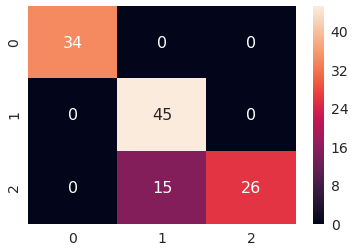

In [90]:
change_confuation_matrix(x_train_orginal,mnb)

Confusion matrix, without normalization
[[34  0  0]
 [ 0 45  0]
 [ 0 15 26]]


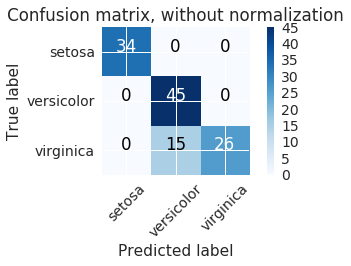

<Figure size 432x288 with 0 Axes>

Normalized confusion matrix
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.36585366  0.63414634]]


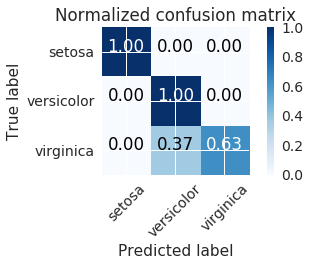

<Figure size 432x288 with 0 Axes>

In [94]:
array=confusion_matrix(y_train_orginal, y_pred_train)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.figure()
    plt.show()
    
    
    
    
    

class_names = iris.target_names
plot_confusion_matrix(array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')



# check all the combination

in this implemetation, we didn't care about the number of change and only focuse to change the accuracy

In [164]:
def combinations_index(iterable, r):
    # combinations('ABCD', 2) --> AB AC AD BC BD CD
    # combinations(range(4), 3) --> 012 013 023 123
    pool = tuple(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))
    yield list(indices)
    
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1

        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield list(indices)


In [189]:
import itertools
def check_all_combination(x_train,y_train,percetage,mnb,change_plan):
    number_change_requested = int(percetage/100*x_train.shape[0])
    print("{} percentage error is equal to {} change \n".format(percetage,number_change_requested))
    
    used_row=[]
    occurred_change = 0
    all_changed = 1
    change_done=False
    x_train_changed = np.copy(x_train)
    
    for i in range(len(change_plan["key"])):
        occurred_change = 0
        
        indices = [t for t, x in enumerate(y_train) if x == change_plan["key"][i][0]]
        print("{} rows have target {} \n".format(len(indices),change_plan["key"][i][0]))
        
        
        for p in range (len(indices)):
            if (all_changed == number_change_requested +1):
                print("your requests have been done :)")
                break
            if y_train[indices[p]] == mnb.predict([x_train[indices[p]]])  and  indices[p] not in used_row :
                

                change_done=False
                for L in range(0, len(x_train_changed[indices[p]])+1):
                    if change_done:

                        break
                    else:
                        for subset in combinations_index(x_train_changed[indices[p]], L):
                            if not subset:
                                pass
                            else:

                                x_train_changed[indices[p]][subset] = 0

                                if (change_plan["key"][i][1] == mnb.predict([x_train_changed[indices[p]]])[0]):

                                    print(x_train[indices[p]],mnb.predict([x_train[indices[p]]])[0])
                                    print(x_train_changed[indices[p]],mnb.predict([x_train_changed[indices[p]]])[0])
                                    print(" \n change number {} \n".format(all_changed))
                                    
                                    used_row.append(indices[p])
                                    occurred_change=occurred_change + 1
                                    change_done=True
                                    all_changed=all_changed + 1
                                    break

                                else:
                                    x_train_changed[indices[p]]= np.copy(x_train[indices[p]])

    if (all_changed<=number_change_requested):
        print("your request doesn't complete! please change your plan")
    return np.copy(x_train_changed)
    

In [192]:
import time
start = time.time()

change_plan={"key":[[0,2],[1,2]],"number":[6]}
new_check_all_combination=check_all_combination(x_test_orginal,y_test_orginal,20,mnb,change_plan)
end = time.time()


print("your execuation time is {} ".format(end - start))

20 percentage error is equal to 6 change 

16 rows have target 0 

[ 5.7  3.8  1.7  0.3] 0
[ 0.   0.   1.7  0.3] 2
 
 change number 1 

[ 5.8  4.   1.2  0.2] 0
[ 0.   0.   1.2  0.2] 2
 
 change number 2 

[ 5.4  3.9  1.7  0.4] 0
[ 0.   0.   1.7  0.4] 2
 
 change number 3 

[ 5.   3.   1.6  0.2] 0
[ 0.   0.   1.6  0.2] 2
 
 change number 4 

[ 4.8  3.4  1.6  0.2] 0
[ 0.   0.   1.6  0.2] 2
 
 change number 5 

[ 4.8  3.   1.4  0.1] 0
[ 0.   0.   1.4  0.1] 2
 
 change number 6 

your requests have been done :)
5 rows have target 1 

your requests have been done :)
your execuation time is 0.01733088493347168 


In [193]:
y_new_check_all_combination =mnb.predict(new_check_all_combination)

print ("Accuracy is {}".format(accuracy_score(y_test_orginal, y_new_check_all_combination)))
confusion_matrix(y_test_orginal,y_new_check_all_combination)

Accuracy is 0.6666666666666666


array([[10,  0,  6],
       [ 0,  5,  0],
       [ 0,  4,  5]])

# check all the combination acording to change plan

In [204]:
import itertools
def check_all_combination_change_plan(x_train,y_train,percetage,mnb,change_plan):
    number_change_requested = int(percetage/100*x_train.shape[0])
    print("{} percentage error is equal to {} change \n".format(percetage,number_change_requested))
    
    used_row=[]
    occurred_change = 0
    all_changed = 1
    change_done=False
    x_train_changed = np.copy(x_train)
    
    for i in range(len(change_plan["key"])):
        occurred_change = 0
        
        indices = [t for t, x in enumerate(y_train) if x == change_plan["key"][i][0]]
        print("{} rows have target {} \n".format(len(indices),change_plan["key"][i][0]))
        
        
        for p in range (len(indices)):
            if (all_changed == number_change_requested +1):
                print("your requests have been done :)")
                break
            if (occurred_change == change_plan["number"][i]):
                print("part of your request has been done!")
                break
                
                
            if y_train[indices[p]] == mnb.predict([x_train[indices[p]]])  and  indices[p] not in used_row :
                

                change_done=False
                for L in range(0, len(x_train_changed[indices[p]])+1):
                    if change_done:

                        break
                    else:
                        for subset in combinations_index(x_train_changed[indices[p]], L):
                            if not subset:
                                pass
                            else:

                                x_train_changed[indices[p]][subset] = 0

                                if (change_plan["key"][i][1] == mnb.predict([x_train_changed[indices[p]]])[0]):

                                    print(x_train[indices[p]],mnb.predict([x_train[indices[p]]])[0])
                                    print(x_train_changed[indices[p]],mnb.predict([x_train_changed[indices[p]]])[0])
                                    print(" \n change number {} \n".format(all_changed))
                                    
                                    used_row.append(indices[p])
                                    occurred_change=occurred_change + 1
                                    change_done=True
                                    all_changed=all_changed + 1
                                    break

                                else:
                                    x_train_changed[indices[p]]= np.copy(x_train[indices[p]])

    if (all_changed<=number_change_requested):
        print("your request doesn't complete! please change your plan")
    return np.copy(x_train_changed)

In [205]:
import time
start = time.time()

change_plan={"key":[[0,1],[2,1]],"number":[3,3]}
new_check_all_combination_change_plan=check_all_combination_change_plan(x_test_orginal,y_test_orginal,20,mnb,change_plan)
end = time.time()


print("your execuation time is {} ".format(end - start))

20 percentage error is equal to 6 change 

16 rows have target 0 

[ 5.7  3.8  1.7  0.3] 0
[ 5.7  0.   1.7  0.3] 1
 
 change number 1 

[ 5.8  4.   1.2  0.2] 0
[ 5.8  0.   1.2  0.2] 1
 
 change number 2 

[ 5.4  3.9  1.7  0.4] 0
[ 5.4  0.   1.7  0.4] 1
 
 change number 3 

part of your request has been done!
9 rows have target 2 

[ 6.4  2.8  5.6  2.1] 2
[ 6.4  2.8  0.   2.1] 1
 
 change number 4 

[ 7.6  3.   6.6  2.1] 2
[ 7.6  3.   6.6  0. ] 1
 
 change number 5 

[ 5.7  2.5  5.   2. ] 2
[ 5.7  2.5  0.   2. ] 1
 
 change number 6 

your requests have been done :)
your execuation time is 0.015331506729125977 


In [206]:
y_new_check_all_combination_change_plan =mnb.predict(new_check_all_combination_change_plan)

print ("Accuracy is {}".format(accuracy_score(y_test_orginal, y_new_check_all_combination_change_plan)))
confusion_matrix(y_test_orginal,y_new_check_all_combination_change_plan)

Accuracy is 0.6666666666666666


array([[13,  3,  0],
       [ 0,  5,  0],
       [ 0,  7,  2]])